In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
#%matplotlib qt5
#%matplotlib
#%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [ ]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

In [4]:
from LayerModel5 import *

In [5]:
from frame import *

In [6]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [ ]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [ ]:
dt_df.tail()

In [ ]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [7]:
dt_df = pd.read_csv('data_csv\\603799.XSHG.csv',index_col=0,parse_dates=True)

In [8]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [9]:
dt_df.head()

,total_turnover,high,close,open,volume,low,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,23049694.0,23.1326,23.0176,23.0560,995930.0,23.0100,0
2019-01-02 09:40:00,16118445.0,23.0406,22.9640,23.0176,698906.0,22.9103,1
2019-01-02 09:45:00,13180271.0,23.0560,22.9870,22.9640,570908.0,22.9563,2
2019-01-02 09:50:00,18621408.0,23.0560,23.0560,22.9870,807439.0,22.9180,3
2019-01-02 09:55:00,14496614.0,23.1863,23.0176,23.0560,625118.0,23.0023,4


## get data list

In [10]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [ ]:
idx.shape

In [ ]:
idx.head()

### Find Market Open

In [ ]:
idx['internal'] = idx['datetime'].diff()

In [ ]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

In [ ]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

### Get 属性数据

In [11]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.lv_L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.lv_L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [12]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [13]:
m = Market(4)
Stick.mm = m
Trend.m = m
Pair.m = m
PairChain.m = m
Signal001.m = m
Signal001.ef = ef

In [14]:
Signal001.L = m.SIG_L
Signal001()

SIG0010-0(TmS:0, 0, 0, 0)

In [15]:
Stick.lv_L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))

In [16]:
TrendLv1 = type('TrendLv1', (Trend,), {'lv_L':m.Lv1_L, 'ML':Stick.lv_L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'lv_L':m.Lv2_L, 'ML':TrendLv1.lv_L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'lv_L':m.Lv3_L, 'ML':TrendLv2.lv_L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 23.055999999999997, 0))

In [17]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv0.regSignal()
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv1.regSignal()
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv2.regSignal()
PairChainLv3 = PairChain(3, 'PairChainLv3')


In [ ]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [ ]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
'''PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()
'''

In [18]:
m.__dict__

{'layer': 4,
 'TmIdx': 0,
 'obj_list': {'st': [[Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
   [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
   [Trend2(0, 0, Point(0.0, 23.055999999999997, 0))],
   [Trend3(0, 0, Point(0.0, 23.055999999999997, 0))],
   []],
  'pair': [[Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   []],
  'pairchain': [[<LayerModel5.PairChain at 0x17372d30>],
   []],
  'mergedpair': [[], [], [], [], []],
  'pattern01': [[], [], [], [], []]},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv0_L': [<LayerModel5.PairChain at 0x17372d30>],
 'MPLv0_L': [],
 'PT01Lv0_L': [],
 'Lv1_L': [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv1_L': [<LayerModel5.PairChain at 0x17847978>],
 'MPLv1_L': [],
 'PT01Lv1_L': [],
 'Lv2_L': [Trend2(0, 0, Point(0.0, 23.055999999999997, 0))],
 'PLv2_L':

In [19]:
ef.event_config

[{'level': 0,
  'Stick': {'NEW': {'method': ['update2', 'update2', 'distr', 'updateAll'],
    'obj_p': ['m.Lv1_L[-1]', 'm.PCLv0_L[0]', 'm.PLv0_L[-1]', 'm.SIG_L[0]'],
    'param': ['', '', '', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': [], 'obj_p': [], 'param': []}}},
 {'level': 1,
  'TrendLv1': {'NEW': {'method': ['update2', 'update2', 'distr'],
    'obj_p': ['m.Lv2_L[-1]', 'm.PCLv1_L[0]', 'm.PLv1_L[-1]'],
    'param': ['', '', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv1_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv2_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT

In [20]:
Position.m = m
Position.L = m.position

In [21]:
time_start=time.time()
main()
time_end=time.time()
print('totally cost：',time_end-time_start)

TmIdx:5.0,[[<frame.Event object at 0x0000000017372F28>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9.0,[[<frame.Event object at 0x0000000017372518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0]
Lv1.update2(): flag:0, treated.status:0,treaded.drt:1,treated.mp:[0, 1]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
Not Prepared!!!!
TmIdx:10.0,[[<frame.Event object at 0x0000000017372978>]]
(0, PairChainLv0, NEW)
TmIdx:12.0,[[<frame.Event object at 0x00000000173724E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13.0,[[<frame.Event object at 0x00000000173722E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14.0,[[<frame.Event object at 0x0000000017372CC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18.0,[[<frame.Event object at 0x0000000017372EF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19.0,[[<frame.Event object at 0x0000000017372978>]]
(0, Stick

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:369.0,[[<frame.Event object at 0x00000000178980F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
Lv1.upd1st():case1, status:1, mp:[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57],pp:5
Lv1.produceNewTrend:case1, mp=[52, 53, 54, 55, 56, 57]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (347.0, 22.7264, -1)),peak(348.0, 22.5731, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (351.0, 22.5041, 1)),peak(347.0, 22.7264, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (357.0, 22.6267, -1)),peak(347.0, 22.7264, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (359.0, 22.5424, 1)),peak(347.0, 22.7264, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (362.0, 22.6727, -1)),peak(347.0, 22.7264, -1),drt:1
Lv1.update2(): flag:2, treated.status:

TmIdx:645.0,[[<frame.Event object at 0x00000000178BC550>]]
(0, PairChainLv0, NEW)
TmIdx:645.0,[[<frame.Event object at 0x00000000178BC748>]]
(2, PairChainLv2, NEW)
TmIdx:647.0,[[<frame.Event object at 0x00000000178BC6D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[93, 94]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[93, 94, 95]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:650.0,[[<frame.Event object at 0x00000000178BC860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[93, 94, 95]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (646.0, 23.0636, 1)),peak(637.0, 23.1709, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[93, 94, 95, 96]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:654.0,[[<frame.Event object at 0x00000000

m.SIG_L[0].updateAll()
TmIdx:888.0,[[<frame.Event object at 0x00000000178DD828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[131, 132, 133, 134]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[131, 132, 133, 134, 135]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:889.0,[[<frame.Event object at 0x00000000178DD978>]]
(0, PairChainLv0, NEW)
TmIdx:892.0,[[<frame.Event object at 0x00000000178DD6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:895.0,[[<frame.Event object at 0x00000000178DD198>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:896.0,[[<frame.Event object at 0x00000000178DD8D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:901.0,[[<frame.Event object at 0x00000000178DD7B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:902.0,[[<frame.Event object at 0x00000000178DD860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:905.0,[[<frame.Event o

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[175, 176, 177, 178, 179]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1191.0, 22.941, 1)),peak(1183.0, 22.918000000000003, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[175, 176, 177, 178, 179, 180]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1202.0,[[<frame.Event object at 0x0000000017907198>]]
(0, PairChainLv0, NEW)
TmIdx:1207.0,[[<frame.Event object at 0x0000000017907978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[175, 176, 177, 178, 179, 180]
Lv1.upd1st():case1, status:1, mp:[175, 176, 177, 178, 179, 180, 181],pp:3
Lv1.produceNewTrend:case1, mp=[178, 179, 180, 181]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1189.0, 23.0713, -1)),peak(1190.0, 22.9563, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1191.0, 2

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1456.0,[[<frame.Event object at 0x00000000179302B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1457.0,[[<frame.Event object at 0x0000000017930320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1460.0,[[<frame.Event object at 0x0000000017930240>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1464.0,[[<frame.Event object at 0x0000000017930278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1465.0,[[<frame.Event object at 0x0000000017930208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1466.0,[[<frame.Event object at 0x00000000179300F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1467.0,[[<frame.Event object at 0x00000000179302E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1470.0,[[<frame.Event object at 0x0000000017930588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[216, 217, 218, 219, 220, 221]
Lv1.upd1s

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1674.0, 30.3376, 1)),peak(1675.0, 30.8205, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1676.0, 31.1807, -1)),peak(1674.0, 30.3376, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1680.0, 29.7244, 1)),peak(1674.0, 30.3376, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[261, 262, 263, 264]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1684.0,[[<frame.Event object at 0x00000000179578D0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[60, 61, 62]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (1669.0, 31.6636, -1)),peak(1677.0, 30.6595, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[60, 61, 62, 63]
m.PCLv1_L[0].update2()
m.PLv1_L[-1

TmIdx:1908.0,[[<frame.Event object at 0x00000000179768D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[298, 299, 300, 301, 302]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1902.0, 29.1112, -1)),peak(1890.0, 29.2645, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[298, 299, 300, 301, 302, 303]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1914.0,[[<frame.Event object at 0x0000000017976A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[298, 299, 300, 301, 302, 303]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[298, 299, 300, 301, 302, 303, 304]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1916.0,[[<frame.Event object at 0x0000000017976AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1918.0,[[<frame.Event object at 0x00000000179769B0>]]
(0, Stick, PEAK)


TmIdx:2146.0,[[<frame.Event object at 0x000000001799C6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2147.0,[[<frame.Event object at 0x000000001799C358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2148.0,[[<frame.Event object at 0x000000001799C438>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2149.0,[[<frame.Event object at 0x000000001799C518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2150.0,[[<frame.Event object at 0x000000001799C7F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2151.0,[[<frame.Event object at 0x000000001799C048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2152.0,[[<frame.Event object at 0x000000001799C748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2153.0,[[<frame.Event object at 0x000000001799C630>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2156.0,[[<frame.Event object at 0x000000001799CA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: fl

(0, PairChainLv0, NEW)
TmIdx:2318.0,[[<frame.Event object at 0x00000000179B84E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[368, 369, 370, 371, 372, 373]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[368, 369, 370, 371, 372, 373, 374]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2318.0,[[<frame.Event object at 0x00000000179B83C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2324.0,[[<frame.Event object at 0x00000000179B8860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[368, 369, 370, 371, 372, 373, 374]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2316.0, 31.0198, -1)),peak(2307.0, 31.0428, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[368, 369, 370, 371, 372, 373, 374, 375]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2340.0,[[<fr

TmIdx:2634.0,[[<frame.Event object at 0x00000000179E2710>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2635.0,[[<frame.Event object at 0x00000000179E2BA8>]]
(1, PairChainLv1, NEW)
TmIdx:2636.0,[[<frame.Event object at 0x00000000179E2A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[413, 414, 415, 416, 417, 418, 419, 420, 421, 422]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2636.0,[[<frame.Event object at 0x00000000179E2AC8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2637.0,[[<frame.Event object at 0x00000000179E2D68>]]
(0, PairChainLv0, NEW)
TmIdx:2642.0,[[<frame.Event object at 0x00000000179E2EB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[413, 414, 415, 416, 417, 418, 419, 420, 4

m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2886.0,[[<frame.Event object at 0x0000000017A02D30>]]
(0, PairChainLv0, NEW)
TmIdx:2888.0,[[<frame.Event object at 0x0000000017A02E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[458, 459, 460, 461, 462, 463, 464]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2882.0, 33.0356, -1)),peak(2874.0, 33.3346, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[458, 459, 460, 461, 462, 463, 464, 465]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2892.0,[[<frame.Event object at 0x0000000017A02F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[458, 459, 460, 461, 462, 463, 464, 465]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[458, 459, 460, 461, 462, 463, 464, 465, 466]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2895.0,[[<fra

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3592.0,[[<frame.Event object at 0x0000000017A31710>]]
(0, PairChainLv0, NEW)
TmIdx:3597.0,[[<frame.Event object at 0x0000000017A31828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[500, 501, 502, 503, 504, 505, 506, 507, 508]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3589.0, 28.5133, -1)),peak(3553.0, 28.7969, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[500, 501, 502, 503, 504, 505, 506, 507, 508, 509]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3600.0,[[<frame.Event object at 0x0000000017A31908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[500, 501, 502, 503, 504, 505, 506, 507, 508, 509]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr(

m.PLv1_L[-1].distr()
TmIdx:3936.0,[[<frame.Event object at 0x0000000017A56E48>, <frame.Event object at 0x0000000017A56DD8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3936.0,[[<frame.Event object at 0x0000000017A56B70>]]
(1, PairChainLv1, NEW)
TmIdx:3937.0,[[<frame.Event object at 0x0000000017A56EF0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3945.0,[[<frame.Event object at 0x0000000017A56F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[552, 553, 554, 555, 556, 557, 558, 559]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[559, 560]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3945.0,[[<frame.Event object at 0x0000000017A56EF0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
Lv2.upd1st():case1, status:1, mp:[101, 102, 103

m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4089.0,[[<frame.Event object at 0x0000000017A6AEB8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4090.0,[[<frame.Event object at 0x0000000017A73240>]]
(0, PairChainLv0, NEW)
TmIdx:4091.0,[[<frame.Event object at 0x0000000017A732B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[575, 576, 577, 578, 579, 580, 581, 582, 583]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4088.0, 21.27, 1)),peak(4080.0, 21.0631, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[575, 576, 577, 578, 579, 580, 581, 582, 583, 584]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4092.0,[[<frame.Event object at 0x0000000017A731D0>]]
(0, PairChainLv0, NEW)
TmIdx:4097.0,[[<frame.Event object at 0x0000000017A73390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,t

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4279.0,[[<frame.Event object at 0x0000000017A8E550>]]
(0, PairChainLv0, NEW)
TmIdx:4280.0,[[<frame.Event object at 0x0000000017A8E5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4275.0, 19.4151, 1)),peak(4269.0, 20.8101, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4281.0,[[<frame.Event object at 0x0000000017A8E6D8>]]
(0, PairChainLv0, NEW)
TmIdx:4283.0,[[<frame.Event object at 0x0000000017A8E710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[599, 600, 601, 602, 603, 604, 605, 606, 607, 608

m.PCLv0_L[0].updateLastSt()
TmIdx:4466.0,[[<frame.Event object at 0x0000000017AA4E48>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4468.0,[[<frame.Event object at 0x0000000017AA4D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4468.0,[[<frame.Event object at 0x0000000017AA4E48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4469.0,[[<frame.Event object at 0x0000000017A69080>]]
(0, PairChainLv0, NEW)
TmIdx:4471.0,[[<frame.Event object at 0x0000000017A69128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:

m.SIG_L[0].updateAll()
TmIdx:4638.0,[[<frame.Event object at 0x0000000017ABAF98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[666, 667, 668, 669]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[666, 667, 668, 669, 670]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4639.0,[[<frame.Event object at 0x0000000017AC10F0>]]
(0, PairChainLv0, NEW)
TmIdx:4640.0,[[<frame.Event object at 0x0000000017ABA898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4641.0,[[<frame.Event object at 0x0000000017ABAF28>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4645.0,[[<frame.Event object at 0x0000000017AC11D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[666, 667, 668, 669, 670]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4640.0, 21.1551, -1)),peak(4641.0, 21.1397, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):

m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:0,treated.mp:[29, 30]
Lv3.update1st:status=0,mp:3,(4182.0, 22.3814, -1),(4292.0, 20.3886, -1),(4582.0, 20.6722, 1),[StdK(4460.0, 20.8868, 20.1663, 1)]
Lv3.update2(): flag:1, treated.status:0,treaded.drt:1,treated.mp:[30, 31]
m.PCLv2_L[0].update2()
m.PLv2_L[-1].distr()
TmIdx:4809.0,[[<frame.Event object at 0x0000000017AD6518>]]
(3, TrendLv3, LVUPD)

TmIdx:4810.0,[[<frame.Event object at 0x0000000017AD6CC0>]]
(1, PairChainLv1, NEW)
TmIdx:4810.0,[[<frame.Event object at 0x0000000017AD6F60>]]
(2, PairChainLv2, NEW)
TmIdx:4811.0,[[<frame.Event object at 0x0000000017AD6E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[702, 703]
Lv1.update1st:status=0,mp:3,(4800.0, 20.6952, 1),(4803.0, 20.9788, 1),(4811.0, 20.8638, -1),[StdK(4802.0, 21.2164, 20.7335, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4808.0, 20.7335, 1)),peak(4803.0, 20.9788, 1),drt:1
Lv1.u

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5095.0,[[<frame.Event object at 0x0000000017B01F28>]]
(0, PairChainLv0, NEW)
TmIdx:5099.0,[[<frame.Event object at 0x0000000017B0C320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[733, 734, 735, 736, 737, 738, 739, 740]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[733, 734, 735, 736, 737, 738, 739, 740, 741]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5099.0,[[<frame.Event object at 0x0000000017B0C1D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5100.0,[[<frame.Event object at 0x0000000017B0C518>]]
(0, PairChainLv0, NEW)
TmIdx:5102.0,[[<frame.Event object at 0x0000000017B0C5C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[733, 734, 735, 736, 737, 738, 739, 740, 741]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5096.0, 21.25, 1)),peak(5088

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5364.0,[[<frame.Event object at 0x0000000017B30940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5365.0,[[<frame.Event object at 0x0000000017B30D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5367.0,[[<frame.Event object at 0x0000000017B30EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5369.0,[[<frame.Event object at 0x0000000017B30EF0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5373.0,[[<frame.Event object at 0x0000000017B05128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[782, 783, 784, 785, 786]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5367.0, 21.45, -1)),peak(5352.0, 21.48, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[782, 783, 784, 785, 786, 787]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5378.0,[[<frame.Event object at 0x0000000

TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (5522.0, 20.95, 1)),peak(5529.0, 21.06, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[157, 158, 159, 160, 161, 162]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:5539.0,[[<frame.Event object at 0x0000000017B463C8>, <frame.Event object at 0x0000000017B46470>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5539.0,[[<frame.Event object at 0x0000000017B46208>]]
(1, PairChainLv1, NEW)
TmIdx:5540.0,[[<frame.Event object at 0x0000000017B40C88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5541.0,[[<frame.Event object at 0x0000000017B46278>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5545.0,[[<frame.Event object at 0x0000000017B462B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[808, 809, 810, 811]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,t

TmIdx:5905.0,[[<frame.Event object at 0x0000000017B80860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5906.0,[[<frame.Event object at 0x0000000017B80630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5907.0,[[<frame.Event object at 0x0000000017B804E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5908.0,[[<frame.Event object at 0x0000000017B80828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5909.0,[[<frame.Event object at 0x0000000017B809E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5911.0,[[<frame.Event object at 0x0000000017B80748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5913.0,[[<frame.Event object at 0x0000000017B80BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[855, 856, 857, 858, 859, 860, 861]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5909.0, 21.8, 1)),peak(5911.0, 21.86, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6177.0,[[<frame.Event object at 0x0000000017BA03C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6178.0,[[<frame.Event object at 0x0000000017BA0FD0>]]
(0, PairChainLv0, NEW)
TmIdx:6184.0,[[<frame.Event object at 0x0000000017BA0C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[902, 903, 904]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6174.0, 21.52, -1)),peak(6152.0, 21.01, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[902, 903, 904, 905]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6185.0,[[<frame.Event object at 0x0000000017BA71D0>]]
(0, PairChainLv0, NEW)
TmIdx:6186.0,[[<frame.Event object at 0x0000000017BA0FD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6187.0,[[<frame.Event object at 0x0000000017BA0E10>]]
(0, Stick, PEAK)
m.

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6369.0,[[<frame.Event object at 0x0000000017BC1208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[925, 926, 927, 928, 929, 930]
Lv1.upd1st():case1, status:1, mp:[925, 926, 927, 928, 929, 930, 931],pp:3
Lv1.produceNewTrend:case1, mp=[928, 929, 930, 931]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6354.0, 21.32, -1)),peak(6355.0, 21.26, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6358.0, 21.25, 1)),peak(6354.0, 21.32, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6362.0, 21.38, -1)),peak(6354.0, 21.32, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[928, 929, 930, 931]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6369.0,[[<frame.Event object at 0x0000000017BC10B8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()


(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6489.0,[[<frame.Event object at 0x0000000017BC5DD8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6490.0,[[<frame.Event object at 0x0000000017BC60F0>]]
(0, PairChainLv0, NEW)
TmIdx:6491.0,[[<frame.Event object at 0x0000000017BC6160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6486.0, 20.85, -1)),peak(6391.0, 20.8, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated

m.SIG_L[0].updateAll()
TmIdx:6698.0,[[<frame.Event object at 0x0000000017BEC390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[968, 969, 970, 971, 972, 973, 974, 975]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[968, 969, 970, 971, 972, 973, 974, 975, 976]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6699.0,[[<frame.Event object at 0x0000000017BEC5C0>]]
(0, PairChainLv0, NEW)
TmIdx:6710.0,[[<frame.Event object at 0x0000000017BEC780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[968, 969, 970, 971, 972, 973, 974, 975, 976]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6697.0, 22.55, -1)),peak(6675.0, 22.7, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[968, 969, 970, 971, 972, 973, 974, 975, 976, 977]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6711.0,[[<frame

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7073.0,[[<frame.Event object at 0x0000000017C26128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7074.0,[[<frame.Event object at 0x0000000017C26630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7075.0,[[<frame.Event object at 0x0000000017C26550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7076.0,[[<frame.Event object at 0x0000000017C26668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7083.0,[[<frame.Event object at 0x0000000017C268D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7075.0, 26.83, 1)),peak(7057.0, 26.38, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7286.0,[[<frame.Event object at 0x0000000017C39B00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066]
Lv1.upd1st():case1, status:1, mp:[1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067],pp:3
Lv1.produceNewTrend:case1, mp=[1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7251.0, 27.25, -1)),peak(7253.0, 26.65, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7254.0, 26.57, 1)),peak(7251.0, 27.25, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7262.0, 26.97, -1)),peak(7251.0, 27.25, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7271.0, 26.19, 1)),peak(7251.0, 27.25, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7273.0, 26.58, -1)),peak(7251.0

m.SIG_L[0].updateAll()
TmIdx:7387.0,[[<frame.Event object at 0x0000000017C44B00>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7389.0,[[<frame.Event object at 0x0000000017C44A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7392.0,[[<frame.Event object at 0x0000000017C44A90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7394.0,[[<frame.Event object at 0x0000000017C44E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1082, 1083, 1084, 1085, 1086, 1087, 1088]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7389.0, 26.1, -1)),peak(7378.0, 26.05, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7395.0,[[<frame.Event object at 0x0000000017C44BE0>]]
(0, PairChainLv0, NEW)
TmIdx:7405

TmIdx:7621.0,[[<frame.Event object at 0x0000000017C65940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1116, 1117, 1118, 1119]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1116, 1117, 1118, 1119, 1120]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7621.0,[[<frame.Event object at 0x0000000017C653C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7629.0,[[<frame.Event object at 0x0000000017C659E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1116, 1117, 1118, 1119, 1120]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7619.0, 24.48, -1)),peak(7606.0, 24.64, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1116, 1117, 1118, 1119, 1120, 1121]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7632.0,[[<frame.Event object at 0x0000000017C65C18>]]
(0, S

m.SIG_L[0].updateAll()
TmIdx:7834.0,[[<frame.Event object at 0x0000000017C7D710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1150, 1151, 1152, 1153]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1150, 1151, 1152, 1153, 1154]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7835.0,[[<frame.Event object at 0x0000000017C7D940>]]
(0, PairChainLv0, NEW)
TmIdx:7837.0,[[<frame.Event object at 0x0000000017C7DA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1150, 1151, 1152, 1153, 1154]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7832.0, 25.49, -1)),peak(7815.0, 25.28, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1150, 1151, 1152, 1153, 1154, 1155]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7840.0,[[<frame.Event object

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1183, 1184, 1185, 1186]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8026.0,[[<frame.Event object at 0x0000000017CA54A8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[232, 233, 234, 235, 236, 237, 238, 239, 240]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (7996.0, 26.39, -1)),peak(7923.0, 26.5, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[232, 233, 234, 235, 236, 237, 238, 239, 240, 241]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:8027.0,[[<frame.Event object at 0x0000000017CA5860>]]
(0, PairChainLv0, NEW)
TmIdx:8032.0,[[<frame.Event object at 0x0000000017CA5908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1183, 1184, 1185, 1186]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.m

m.PCLv0_L[0].updateLastSt()
TmIdx:8200.0,[[<frame.Event object at 0x0000000017CB6908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8201.0,[[<frame.Event object at 0x0000000017CB69B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8205.0,[[<frame.Event object at 0x0000000017CB6B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1212, 1213, 1214, 1215]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1212, 1213, 1214, 1215, 1216]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8205.0,[[<frame.Event object at 0x0000000017CB6898>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8206.0,[[<frame.Event object at 0x0000000017CB6B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8208.0,[[<frame.Event object at 0x0000000017CB66A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8209.0,[[<frame.Event object at 0x0000000017CB6C88>]]
(0, Stick, LVUP

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1238, 1239, 1240, 1241]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1238, 1239, 1240, 1241, 1242]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8378.0,[[<frame.Event object at 0x0000000017CCDB00>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8380.0,[[<frame.Event object at 0x0000000017CCDE48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1238, 1239, 1240, 1241, 1242]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8377.0, 26.53, -1)),peak(8369.0, 26.74, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1238, 1239, 1240, 1241, 1242, 1243]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8381.0,[[<frame.Event object at 0x0000000017CC6080>]]
(0, PairChainLv0, NEW)
TmIdx:8386.0,[[<frame.Event object at 0x0000000017CC6048>]]
(0, Stick, NEW)
m.Lv

m.SIG_L[0].updateAll()
TmIdx:8514.0,[[<frame.Event object at 0x0000000017CE3898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1264, 1265, 1266, 1267]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1264, 1265, 1266, 1267, 1268]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8517.0,[[<frame.Event object at 0x0000000017CE3320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8519.0,[[<frame.Event object at 0x0000000017CE38D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8528.0,[[<frame.Event object at 0x0000000017CE3CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1264, 1265, 1266, 1267, 1268]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8517.0, 27.25, -1)),peak(8519.0, 27.06, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.m

TmIdx:8633.0,[[<frame.Event object at 0x0000000017CF2358>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8634.0,[[<frame.Event object at 0x0000000017CF2668>]]
(0, PairChainLv0, NEW)
TmIdx:8641.0,[[<frame.Event object at 0x0000000017CF27B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8632.0, 29.12, -1)),peak(8624.0, 29.7, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8642.0,[[<frame.Event object at 0x0000000017CF25F8>]]
(0, PairChainLv0, NEW)
TmIdx:8643.0,[[<frame.Event object at 0x0000000017CF2898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1276, 1277, 127

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1323, 1324, 1325, 1326, 1327]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8919.0, 25.76, 1)),peak(8901.0, 25.6, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1323, 1324, 1325, 1326, 1327, 1328]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8930.0,[[<frame.Event object at 0x0000000017D27630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1323, 1324, 1325, 1326, 1327, 1328]
Lv1.upd1st():case1, status:1, mp:[1323, 1324, 1325, 1326, 1327, 1328, 1329],pp:3
Lv1.produceNewTrend:case1, mp=[1326, 1327, 1328, 1329]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8911.0, 25.86, -1)),peak(8908.0, 25.71, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8919.0, 25.76, 1)),peak(8911.0, 25.86, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1349, 1350, 1351, 1352]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1349, 1350, 1351, 1352, 1353]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9097.0,[[<frame.Event object at 0x0000000017D3C940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9102.0,[[<frame.Event object at 0x0000000017D3C898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9103.0,[[<frame.Event object at 0x0000000017D3CB38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9106.0,[[<frame.Event object at 0x0000000017D3CA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9107.0,[[<frame.Event object at 0x0000000017D3CB70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9109.0,[[<frame.Event object at 0x0000000017D3CC88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9110.0,[[<frame.Event object at 0x0000000017D3CD68>]]
(0, Stick, PE

m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[291, 292, 293, 294]
Lv2.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[294, 295]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:9499.0,[[<frame.Event object at 0x0000000017D73F60>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[55, 56, 57, 58, 59]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (9409.0, 23.5, 1)),peak(9256.0, 23.24, 1),drt:-1
Lv3.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[55, 56, 57, 58, 59, 60]
m.PCLv2_L[0].update2()
m.PLv2_L[-1].distr()
TmIdx:9500.0,[[<frame.Event object at 0x0000000017D7E128>, <frame.Event object at 0x0000000017D73EF0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9500.0,[[<frame.Event object at 0x0000000017D7E048>]]
(2, PairChainLv2, NEW)
TmIdx:9504.0,[[<frame.Event object at 0x0000000017D739B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9917.0,[[<frame.Event object at 0x0000000017DB0C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9914.0, 27.09, -1)),peak(9888.0, 27.26, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9919.0,[[<frame.Event object at 0x0000000017DB0DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9924.0,[[<frame.

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10109.0,[[<frame.Event object at 0x0000000017DC1320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10110.0,[[<frame.Event object at 0x0000000017DC1630>]]
(0, PairChainLv0, NEW)
TmIdx:10115.0,[[<frame.Event object at 0x0000000017DC1710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10108.0, 24.89, 1)),peak(10081.0, 24.62, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp

m.SIG_L[0].updateAll()
TmIdx:10253.0,[[<frame.Event object at 0x0000000017DD9780>]]
(0, PairChainLv0, NEW)
TmIdx:10259.0,[[<frame.Event object at 0x0000000017DD9940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1504, 1505, 1506, 1507, 1508, 1509]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1504, 1505, 1506, 1507, 1508, 1509, 1510]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10259.0,[[<frame.Event object at 0x0000000017DD9860>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10260.0,[[<frame.Event object at 0x0000000017DD9C88>]]
(0, PairChainLv0, NEW)
TmIdx:10262.0,[[<frame.Event object at 0x0000000017DD9CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1504, 1505, 1506, 1507, 1508, 1509, 1510]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10258.0, 27.15, -1)),peak(10248.0, 26.93, -1),drt:1
Tr

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10434.0,[[<frame.Event object at 0x0000000017DF44A8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10436.0,[[<frame.Event object at 0x0000000017DF4D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1532, 1533]
Lv1.update1st:status=0,mp:3,(10419.0, 27.5, 1),(10426.0, 28.21, 1),(10436.0, 28.11, -1),[StdK(10424.0, 28.63, 28.0, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10433.0, 27.95, 1)),peak(10426.0, 28.21, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1532, 1533, 1534]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10436.0,[[<frame.Event object at 0x0000000017DF4E10>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10439.0,[[<frame.Event object at 0x0000000017DF4E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1561, 1562, 1563, 1564, 1565]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10581.0, 30.26, 1)),peak(10560.0, 30.66, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1561, 1562, 1563, 1564, 1565, 1566]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10588.0,[[<frame.Event object at 0x0000000018233400>, <frame.Event object at 0x00000000182335C0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10589.0,[[<frame.Event object at 0x0000000017E09A20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10590.0,[[<frame.Event object at 0x0000000018233390>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10594.0,[[<frame.Event object at 0x00000000182336D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10736.0,[[<frame.Event object at 0x000000001824A8D0>]]
(0, PairChainLv0, NEW)
TmIdx:10743.0,[[<frame.Event object at 0x000000001824AA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1589, 1590, 1591, 1592, 1593]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10734.0, 29.24, 1)),peak(10722.0, 29.0, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1589, 1590, 1591, 1592, 1593, 1594]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10744.0,[[<frame.Event object at 0x000000001824AB38>, <frame.Event object at 0x000000001824AB70>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10745.0,[[<frame.Event object at 0x000000001824ABE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10746.0,[[<frame.Event object at 0x000000001824A828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt(

m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10902.0,[[<frame.Event object at 0x0000000018263B70>]]
(0, PairChainLv0, NEW)
TmIdx:10902.0,[[<frame.Event object at 0x0000000018263CC0>]]
(1, PairChainLv1, NEW)
TmIdx:10903.0,[[<frame.Event object at 0x0000000018263C18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10904.0,[[<frame.Event object at 0x0000000018263B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10905.0,[[<frame.Event object at 0x0000000018263978>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10911.0,[[<frame.Event object at 0x0000000018263DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1616, 1617, 1618, 1619]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1616, 1617, 1618, 1619, 1620]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10911.0,[[<frame.Event object at 0x0000000018263978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1639, 1640, 1641, 1642]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1639, 1640, 1641, 1642, 1643]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11086.0,[[<frame.Event object at 0x000000001827FB70>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11087.0,[[<frame.Event object at 0x000000001827FDD8>]]
(0, PairChainLv0, NEW)
TmIdx:11090.0,[[<frame.Event object at 0x000000001827FE80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1639, 1640, 1641, 1642, 1643]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11085.0, 30.05, 1)),peak(11076.0, 30.12, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1639, 1640, 1641, 1642, 1643, 1644]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11091.0,[[<frame.Event 

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11265.0,[[<frame.Event object at 0x000000001829B2B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11267.0,[[<frame.Event object at 0x000000001829B320>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11271.0,[[<frame.Event object at 0x000000001829B4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1667, 1668, 1669, 1670, 1671, 1672]
Lv1.upd1st():case1, status:1, mp:[1667, 1668, 1669, 1670, 1671, 1672, 1673],pp:5
Lv1.produceNewTrend:case1, mp=[1672, 1673]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1672, 1673]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11271.0,[[<frame.Event object at 0x000000001829B400>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[338, 339, 340, 341, 342, 343, 344, 345]
Lv2.upd1st():case1, status:1, mp:[338, 339, 340, 341, 342, 343, 344,

TmIdx:11442.0,[[<frame.Event object at 0x00000000182B43C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11443.0,[[<frame.Event object at 0x00000000182B4C88>]]
(0, PairChainLv0, NEW)
TmIdx:11446.0,[[<frame.Event object at 0x00000000182B47F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1698, 1699, 1700]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11441.0, 34.26, -1)),peak(11434.0, 33.6, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1698, 1699, 1700, 1701]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11447.0,[[<frame.Event object at 0x00000000182B4B70>]]
(0, PairChainLv0, NEW)
TmIdx:11450.0,[[<frame.Event object at 0x00000000182B4D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1698, 1699, 1700, 1701]
Lv1.update2(): flag:1, treated.stat

m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11602.0,[[<frame.Event object at 0x00000000182C9E48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11603.0,[[<frame.Event object at 0x00000000182CC208>]]
(0, PairChainLv0, NEW)
TmIdx:11606.0,[[<frame.Event object at 0x00000000182CC320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11601.0, 40.1, -1)),peak(11591.0, 40.56, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11609.0,[[<frame.Event object at 0x00000000182CC438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treate

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1756, 1757, 1758, 1759, 1760, 1761]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1756, 1757, 1758, 1759, 1760, 1761, 1762]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11804.0,[[<frame.Event object at 0x00000000182EA828>]]
(0, PairChainLv0, NEW)
TmIdx:11807.0,[[<frame.Event object at 0x00000000182EA6D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11808.0,[[<frame.Event object at 0x00000000182EA710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11809.0,[[<frame.Event object at 0x00000000182EA780>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11813.0,[[<frame.Event object at 0x00000000182EAA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1756, 1757, 1758, 1759, 1760, 1761, 1762]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11808.0, 45.38, -1)),peak(118

TmIdx:11976.0,[[<frame.Event object at 0x0000000018303DD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11977.0,[[<frame.Event object at 0x00000000183036A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11979.0,[[<frame.Event object at 0x0000000018303C88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11980.0,[[<frame.Event object at 0x0000000018303DD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11981.0,[[<frame.Event object at 0x00000000183036A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11983.0,[[<frame.Event object at 0x00000000182E6048>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11991.0,[[<frame.Event object at 0x00000000182E6358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793]
Lv1.upd1st():case1, status:1, mp:[1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794],pp:7
Lv1.produceNewTrend:case1, mp

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1815, 1816, 1817, 1818, 1819, 1820]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1815, 1816, 1817, 1818, 1819, 1820, 1821]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12146.0,[[<frame.Event object at 0x00000000183232E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12147.0,[[<frame.Event object at 0x0000000018323630>, <frame.Event object at 0x0000000018323390>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12148.0,[[<frame.Event object at 0x0000000018323470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12149.0,[[<frame.Event object at 0x0000000018323358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12150.0,[[<frame.Event object at 0x00000000183234E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12151.0,[[<frame.Event object at 0x00000000183236A0>]]
(0, Stick, PEAK)
m

m.PLv2_L[-1].distr()
TmIdx:12251.0,[[<frame.Event object at 0x0000000018329DA0>]]
(0, PairChainLv0, NEW)
TmIdx:12251.0,[[<frame.Event object at 0x0000000018329FD0>]]
(2, PairChainLv2, NEW)
TmIdx:12256.0,[[<frame.Event object at 0x0000000018329DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[1837, 1838]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12256.0,[[<frame.Event object at 0x0000000018329B00>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[371, 372, 373, 374]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[371, 372, 373, 374, 375]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:12257.0,[[<frame.Event object at 0x000000001832E198>]]
(0, PairChainLv0, NEW)
TmIdx:12258.0,[[<frame.Event object at 0x0000000

Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1846, 1847]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12320.0,[[<frame.Event object at 0x0000000018320B70>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[371, 372, 373, 374, 375, 376, 377]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (12303.0, 44.37, 1)),peak(12276.0, 44.3, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[371, 372, 373, 374, 375, 376, 377, 378]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:12321.0,[[<frame.Event object at 0x0000000018320CC0>]]
(0, PairChainLv0, NEW)
TmIdx:12321.0,[[<frame.Event object at 0x00000000183209E8>]]
(1, PairChainLv1, NEW)
TmIdx:12322.0,[[<frame.Event object at 0x00000000183209B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1846, 1847]
Lv1.update1st:status=0,mp:3,(12303.0, 44.37, 1),(12309.0, 45.09, 1)

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12463.0,[[<frame.Event object at 0x0000000018356F98>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12466.0,[[<frame.Event object at 0x0000000018360198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[1873, 1874]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12466.0,[[<frame.Event object at 0x0000000018356EF0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (12440.0, 49.36, -1)),peak(12436.0, 47.36, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[376, 377, 378, 379, 380, 381, 382, 383, 

TmIdx:12694.0,[[<frame.Event object at 0x0000000018373908>]]
(0, PairChainLv0, NEW)
TmIdx:12698.0,[[<frame.Event object at 0x0000000018373AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1899, 1900, 1901, 1902, 1903, 1904]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1899, 1900, 1901, 1902, 1903, 1904, 1905]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12698.0,[[<frame.Event object at 0x0000000018373A20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12699.0,[[<frame.Event object at 0x0000000018373DA0>]]
(0, PairChainLv0, NEW)
TmIdx:12700.0,[[<frame.Event object at 0x0000000018373C18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12701.0,[[<frame.Event object at 0x0000000018373A90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12703.0,[[<frame.Event object at 0x0000000018373E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_beg

Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12893.0,[[<frame.Event object at 0x000000001838B5F8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12894.0,[[<frame.Event object at 0x0000000018391240>]]
(0, PairChainLv0, NEW)
TmIdx:12895.0,[[<frame.Event object at 0x00000000183912B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12892.0, 56.5, -1)),peak(12882.0, 58.61, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 192

m.PLv1_L[-1].distr()
TmIdx:13042.0,[[<frame.Event object at 0x00000000183A90B8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13043.0,[[<frame.Event object at 0x00000000183A9358>]]
(0, PairChainLv0, NEW)
TmIdx:13043.0,[[<frame.Event object at 0x00000000183A9518>, <frame.Event object at 0x00000000183A95C0>]]
(1, PairChainLv1, NEW)
(1, PairChainLv1, NEW)
TmIdx:13045.0,[[<frame.Event object at 0x00000000183A9400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1953, 1954, 1955, 1956]
Lv1.upd1st():case1, status:1, mp:[1953, 1954, 1955, 1956, 1957],pp:1
Lv1.produceNewTrend:case1, mp=[1954, 1955, 1956, 1957]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13035.0, 53.26, -1)),peak(13033.0, 52.61, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13037.0, 52.81, 1)),peak(13035.0, 53.26, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13039.0, 53.45, -1

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13281.0,[[<frame.Event object at 0x00000000183C2978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13282.0,[[<frame.Event object at 0x00000000183C2C18>]]
(0, PairChainLv0, NEW)
TmIdx:13284.0,[[<frame.Event object at 0x00000000183C2C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13280.0, 45.4, -1)),peak(13225.0, 43.4, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1974,

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13484.0,[[<frame.Event object at 0x00000000183E41D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13485.0,[[<frame.Event object at 0x00000000183E40B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13486.0,[[<frame.Event object at 0x00000000183E4080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13488.0,[[<frame.Event object at 0x00000000183E42E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13492.0,[[<frame.Event object at 0x00000000183E44E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13486.0, 38.2, 1)),peak(13449.0, 36.81, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 

Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[2034, 2035]
Lv1.update1st:status=0,mp:3,(13632.0, 39.3, 1),(13642.0, 41.34, 1),(13649.0, 41.49, -1),[StdK(13641.0, 41.93, 41.24, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13644.0, 41.24, 1)),peak(13642.0, 41.34, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2034, 2035, 2036]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13649.0,[[<frame.Event object at 0x00000000183FC860>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13650.0,[[<frame.Event object at 0x00000000183FCA58>]]
(0, PairChainLv0, NEW)
TmIdx:13655.0,[[<frame.Event object at 0x00000000183FC470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2034, 2035, 2036]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13647.0, 41.72, -1)),peak(13642.0, 41.34, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEA

TmIdx:13814.0,[[<frame.Event object at 0x0000000018414C50>]]
(0, PairChainLv0, NEW)
TmIdx:13815.0,[[<frame.Event object at 0x0000000018414E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13815.0,[[<frame.Event object at 0x0000000018414D68>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13816.0,[[<frame.Event object at 0x00000000184030B8>]]
(0, PairChainLv0, NEW)
TmIdx:13819.0,[[<frame.Event object at 0x0000000018403160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13814

m.PLv2_L[-1].distr()
TmIdx:14111.0,[[<frame.Event object at 0x00000000184526A0>]]
(0, PairChainLv0, NEW)
TmIdx:14111.0,[[<frame.Event object at 0x00000000184522B0>]]
(2, PairChainLv2, NEW)
TmIdx:14113.0,[[<frame.Event object at 0x0000000018452748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2108, 2109, 2110, 2111]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2108, 2109, 2110, 2111, 2112]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14113.0,[[<frame.Event object at 0x0000000018452390>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14114.0,[[<frame.Event object at 0x00000000184529B0>]]
(0, PairChainLv0, NEW)
TmIdx:14115.0,[[<frame.Event object at 0x0000000018452A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2108, 2109, 2110, 2111, 2112]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14112.0,

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[2139, 2140, 2141, 2142]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14311.0,[[<frame.Event object at 0x00000000184674E0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[438, 439, 440, 441, 442]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (14291.0, 31.32, -1)),peak(14260.0, 31.53, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[438, 439, 440, 441, 442, 443]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:14312.0,[[<frame.Event object at 0x0000000018467A90>]]
(0, PairChainLv0, NEW)
TmIdx:14312.0,[[<frame.Event object at 0x00000000184678D0>]]
(1, PairChainLv1, NEW)
TmIdx:14314.0,[[<frame.Event object at 0x0000000018467B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14315.0,[[<frame.Event object at 0x0000000018467C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14491.0, 29.45, -1)),peak(14480.0, 29.65, -1),drt:1
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[2164, 2165, 2166, 2167]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14495.0,[[<frame.Event object at 0x0000000018480AC8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[441, 442, 443, 444, 445, 446, 447]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (14475.0, 28.69, 1)),peak(14417.0, 28.35, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[441, 442, 443, 444, 445, 446, 447, 448]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:14496.0,[[<frame.Event object at 0x0000000018480F98>]]
(1, PairChainLv1, NEW)
TmIdx:14503.0,[[<frame.Event object at 0x0000000018480EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2164, 2165, 2166, 2167]
Lv1.upda

Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[449, 450, 451, 452]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:14643.0,[[<frame.Event object at 0x0000000018494BA8>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[81, 82, 83, 84, 85, 86]
Lv3.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[81, 82, 83, 84, 85, 86, 87]
m.PCLv2_L[0].update2()
m.PLv2_L[-1].distr()
TmIdx:14643.0,[[<frame.Event object at 0x0000000018494AC8>]]
(3, TrendLv3, LVUPD)

TmIdx:14644.0,[[<frame.Event object at 0x0000000018494E10>]]
(0, PairChainLv0, NEW)
TmIdx:14644.0,[[<frame.Event object at 0x000000001849B048>]]
(1, PairChainLv1, NEW)
TmIdx:14644.0,[[<frame.Event object at 0x000000001849B198>]]
(2, PairChainLv2, NEW)
TmIdx:14648.0,[[<frame.Event object at 0x0000000018494EB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2190, 2191, 2192, 2193]
Lv1.update2(): flag:1, treated

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14823.0,[[<frame.Event object at 0x00000000184B8710>]]
(0, PairChainLv0, NEW)
TmIdx:14825.0,[[<frame.Event object at 0x00000000184B8780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2219, 2220, 2221, 2222, 2223]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14821.0, 32.32, 1)),peak(14814.0, 32.22, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2219, 2220, 2221, 2222, 2223, 2224]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14829.0,[[<frame.Event object at 0x00000000184B88D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2219, 2220, 2221, 2222, 2223, 2224]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2219, 2220, 2221, 2222, 2223, 2224, 2225]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14832.0

m.SIG_L[0].updateAll()
TmIdx:15001.0,[[<frame.Event object at 0x00000000184CF908>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15002.0,[[<frame.Event object at 0x00000000184CFBE0>]]
(0, PairChainLv0, NEW)
TmIdx:15003.0,[[<frame.Event object at 0x00000000184CFC50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2244, 2245, 2246, 2247, 2248, 2249, 2250]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15000.0, 34.61, -1)),peak(14987.0, 34.93, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15004.0,[[<frame.Event object at 0x00000000184CFDA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15005.0,[[<frame.Event object at 0x00000000184CFE10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15007.0,[[<frame.Event object at 0x00000000184CF9E8>]]


m.SIG_L[0].updateAll()
TmIdx:15169.0,[[<frame.Event object at 0x00000000184E4BA8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[463, 464, 465, 466, 467, 468, 469]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (15144.0, 32.37, 1)),peak(15146.0, 32.56, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[463, 464, 465, 466, 467, 468, 469, 470]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:15170.0,[[<frame.Event object at 0x00000000184F02E8>]]
(0, PairChainLv0, NEW)
TmIdx:15170.0,[[<frame.Event object at 0x00000000184F03C8>]]
(1, PairChainLv1, NEW)
TmIdx:15172.0,[[<frame.Event object at 0x00000000184F0390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2276, 2277, 2278, 2279]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[2279, 2280]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L

m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15328.0,[[<frame.Event object at 0x00000000185085C0>]]
(0, PairChainLv0, NEW)
TmIdx:15329.0,[[<frame.Event object at 0x0000000018508748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2305, 2306, 2307, 2308]
Lv1.upd1st():case1, status:1, mp:[2305, 2306, 2307, 2308, 2309],pp:3
Lv1.produceNewTrend:case1, mp=[2308, 2309]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[2308, 2309]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15329.0,[[<frame.Event object at 0x0000000018508208>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[473, 474, 475]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (15321.0, 32.34, 1)),peak(15315.0, 32.13, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[473, 474, 475, 476]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2334, 2335, 2336]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15481.0, 34.63, -1)),peak(15483.0, 34.41, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2334, 2335, 2336, 2337]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15487.0,[[<frame.Event object at 0x0000000018520C88>]]
(0, PairChainLv0, NEW)
TmIdx:15491.0,[[<frame.Event object at 0x0000000018520CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2334, 2335, 2336, 2337]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2334, 2335, 2336, 2337, 2338]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15491.0,[[<frame.Event object at 0x0000000018520B00>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15492.0,[[<frame.Event ob

TmIdx:15658.0,[[<frame.Event object at 0x0000000018540208>]]
(0, PairChainLv0, NEW)
TmIdx:15659.0,[[<frame.Event object at 0x0000000018540048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15660.0,[[<frame.Event object at 0x0000000018538FD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15661.0,[[<frame.Event object at 0x0000000018538A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15662.0,[[<frame.Event object at 0x00000000185400B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15664.0,[[<frame.Event object at 0x0000000018540358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2365, 2366, 2367, 2368, 2369]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15661.0, 36.7, 1)),peak(15662.0, 36.72, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2365, 2366, 2367, 2368, 2369, 2370]
m.PCLv0_L[0].update2()
m.PLv

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15816.0, 35.7, -1)),peak(15806.0, 35.79, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2392, 2393, 2394, 2395, 2396, 2397]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15825.0,[[<frame.Event object at 0x000000001855A1D0>]]
(0, PairChainLv0, NEW)
TmIdx:15836.0,[[<frame.Event object at 0x000000001855A518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2392, 2393, 2394, 2395, 2396, 2397]
Lv1.upd1st():case1, status:1, mp:[2392, 2393, 2394, 2395, 2396, 2397, 2398],pp:3
Lv1.produceNewTrend:case1, mp=[2395, 2396, 2397, 2398]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15814.0, 35.49, 1)),peak(15810.0, 35.7, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15816.0, 35.7, -1)),peak(15814.0, 35.49, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (158

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16005.0,[[<frame.Event object at 0x0000000018573A20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16008.0,[[<frame.Event object at 0x0000000018573A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16009.0,[[<frame.Event object at 0x0000000018573898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16010.0,[[<frame.Event object at 0x00000000185736A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16015.0,[[<frame.Event object at 0x0000000018573B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421]
Lv1.upd1st():case1, status:1, mp:[2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422],pp:5
Lv1.produceNewTrend:case1, mp=[2419, 2420, 2421, 2422]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15993.0, 36.4, 1)),peak(15990.0, 36.75, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:

Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2440, 2441, 2442, 2443, 2444, 2445]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16186.0,[[<frame.Event object at 0x000000001858FDA0>]]
(0, PairChainLv0, NEW)
TmIdx:16189.0,[[<frame.Event object at 0x000000001858FC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2440, 2441, 2442, 2443, 2444, 2445]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2440, 2441, 2442, 2443, 2444, 2445, 2446]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16189.0,[[<frame.Event object at 0x000000001858FB38>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16190.0,[[<frame.Event object at 0x000000001858FF28>]]
(0, PairChainLv0, NEW)
TmIdx:16193.0,[[<frame.Event object at 0x0000000018578048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2440, 2441, 2442

m.PLv1_L[-1].distr()
TmIdx:16369.0,[[<frame.Event object at 0x00000000185A2E10>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16370.0,[[<frame.Event object at 0x00000000185AD0B8>]]
(0, PairChainLv0, NEW)
TmIdx:16370.0,[[<frame.Event object at 0x00000000185AD208>]]
(1, PairChainLv1, NEW)
TmIdx:16371.0,[[<frame.Event object at 0x00000000185AD160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2465, 2466, 2467, 2468]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2465, 2466, 2467, 2468, 2469]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16371.0,[[<frame.Event object at 0x00000000185A2E10>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16377.0,[[<frame.Event object at 0x00000000185AD358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2465, 2466, 2467, 2468, 2469]
TrendLv1.updatedPeakP(st_idx_in_ss)

m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[515, 516, 517, 518]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[515, 516, 517, 518, 519]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:16521.0,[[<frame.Event object at 0x00000000185C74A8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16522.0,[[<frame.Event object at 0x00000000185C7710>]]
(0, PairChainLv0, NEW)
TmIdx:16522.0,[[<frame.Event object at 0x00000000185C78D0>]]
(1, PairChainLv1, NEW)
TmIdx:16523.0,[[<frame.Event object at 0x00000000185C77B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2493, 2494, 2495, 2496]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[2496, 2497]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16523.0,[[<frame.Event object at 0x00000000185C74A8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,

(0, PairChainLv0, NEW)
TmIdx:16681.0,[[<frame.Event object at 0x00000000185E16A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2517, 2518, 2519]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16672.0, 34.95, 1)),peak(16661.0, 35.28, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2517, 2518, 2519, 2520]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16685.0,[[<frame.Event object at 0x00000000185E1BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2517, 2518, 2519, 2520]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2517, 2518, 2519, 2520, 2521]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16687.0,[[<frame.Event object at 0x00000000185E1D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.

Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[523, 524, 525, 526, 527, 528, 529, 530, 531, 532]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:16830.0,[[<frame.Event object at 0x0000000018600048>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16831.0,[[<frame.Event object at 0x0000000018600160>]]
(1, PairChainLv1, NEW)
TmIdx:16832.0,[[<frame.Event object at 0x00000000185F8DD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16836.0,[[<frame.Event object at 0x00000000185F8780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16838.0,[[<frame.Event object at 0x00000000185F8FD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16839.0,[[<frame.Event object at 0x00000000185F8DD8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16846.0,[[<frame.Event object at 0x0000000018600358>]]
(0, Stick, NEW)
m.Lv1_

TmIdx:17024.0,[[<frame.Event object at 0x000000001861F588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576]
Lv1.upd1st():case1, status:1, mp:[2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577],pp:1
Lv1.produceNewTrend:case1, mp=[2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16981.0, 38.49, -1)),peak(16978.0, 37.93, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16991.0, 37.99, 1)),peak(16981.0, 38.49, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16994.0, 38.88, -1)),peak(16981.0, 38.49, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16996.0, 38.21, 1)),peak(16994.0, 38.88, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17002.0,

m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17167.0,[[<frame.Event object at 0x0000000018633780>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17169.0,[[<frame.Event object at 0x0000000018633908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17171.0,[[<frame.Event object at 0x00000000186336D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17172.0,[[<frame.Event object at 0x0000000018633940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17173.0,[[<frame.Event object at 0x0000000018633AC8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17185.0,[[<frame.Event object at 0x0000000018633CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17172.0, 38.5, 1)),peak(17158.0, 38.51, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv

TmIdx:17357.0,[[<frame.Event object at 0x000000001864E668>]]
(0, PairChainLv0, NEW)
TmIdx:17358.0,[[<frame.Event object at 0x000000001864EBA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17359.0,[[<frame.Event object at 0x000000001864E908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17360.0,[[<frame.Event object at 0x000000001864EAC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17362.0,[[<frame.Event object at 0x000000001864EB00>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17364.0,[[<frame.Event object at 0x000000001864ECF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2626, 2627, 2628, 2629, 2630, 2631]
Lv1.upd1st():case1, status:1, mp:[2626, 2627, 2628, 2629, 2630, 2631, 2632],pp:3
Lv1.produceNewTrend:case1, mp=[2629, 2630, 2631, 2632]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17342.0, 40.38, 1)),peak(17345.0, 40.68, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_s

(0, PairChainLv0, NEW)
TmIdx:17519.0,[[<frame.Event object at 0x000000001866A128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17519.0,[[<frame.Event object at 0x0000000018665F98>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17520.0,[[<frame.Event object at 0x000000001866A390>, <frame.Event object at 0x000000001866A240>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17521.0,[[<frame.Event object at 0x0000000018665B70>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17524.0,[[<frame.Event object at 0x000000001866A470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,tr

TmIdx:17693.0,[[<frame.Event object at 0x0000000018683C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2688, 2689, 2690, 2691]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2688, 2689, 2690, 2691, 2692]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17697.0,[[<frame.Event object at 0x0000000018683E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2688, 2689, 2690, 2691, 2692]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17692.0, 44.75, -1)),peak(17668.0, 45.61, 1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2688, 2689, 2690, 2691, 2692, 2693]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17698.0,[[<frame.Event object at 0x000000001868A048>]]
(0, PairChainLv0, NEW)
TmIdx:17702.0,[[<frame.Event object at 0x0000000018683FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()


(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17881.0,[[<frame.Event object at 0x00000000186A2208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17882.0,[[<frame.Event object at 0x00000000186A2390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17883.0,[[<frame.Event object at 0x00000000186A23C8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17884.0,[[<frame.Event object at 0x00000000186A22E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17885.0,[[<frame.Event object at 0x00000000186A2400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17886.0,[[<frame.Event object at 0x00000000186A2358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17887.0,[[<frame.Event object at 0x00000000186A2198>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17889.0,[[<frame.Event object at 0x00000000186A26A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2713, 2714, 2715, 2716, 2717, 

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18056.0,[[<frame.Event object at 0x00000000186BA748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18058.0,[[<frame.Event object at 0x00000000186BA908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2739, 2740, 2741, 2742, 2743, 2744, 2745]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (18055.0, 42.35, 1)),peak(18017.0, 41.51, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18062.0,[[<frame.Event object at 0x00000000186BAA90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746]
Lv1.upd1st():case1, status:1, mp:[2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747],pp:1
Lv1.produceNewTrend:case1, mp=[2740, 2741

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2768, 2769, 2770, 2771]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2768, 2769, 2770, 2771, 2772]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18244.0,[[<frame.Event object at 0x00000000186D8198>, <frame.Event object at 0x00000000186D39E8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18246.0,[[<frame.Event object at 0x00000000186D3F28>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18256.0,[[<frame.Event object at 0x00000000186D8358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2768, 2769, 2770, 2771, 2772]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (18244.0, 45.1, -1)),peak(18246.0, 44.75, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2768, 2769, 2770, 2771, 2772, 2773]
m.PCLv0_L[0

m.PCLv0_L[0].updateLastSt()
TmIdx:18431.0,[[<frame.Event object at 0x00000000186EBA58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18432.0,[[<frame.Event object at 0x00000000186EBA90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18433.0,[[<frame.Event object at 0x00000000186EB668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18439.0,[[<frame.Event object at 0x00000000186EBDD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800]
Lv1.upd1st():case1, status:1, mp:[2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801],pp:11
Lv1.produceNewTrend:case1, mp=[2798, 2799, 2800, 2801]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (18410.0, 42.45, -1)),peak(18411.0, 42.25, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (18421.0, 41.94, 1)),peak(18410.0,

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18626.0,[[<frame.Event object at 0x000000001870D048>]]
(0, PairChainLv0, NEW)
TmIdx:18627.0,[[<frame.Event object at 0x000000001870D2E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2822, 2823, 2824, 2825, 2826, 2827]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[2827, 2828]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18627.0,[[<frame.Event object at 0x000000001870D208>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (18618.0, 47.11, -1)),peak(18556.0, 48.17, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
TmIdx:18628.0,[[<frame.Event object at 0

m.PCLv0_L[0].updateLastSt()
TmIdx:18816.0,[[<frame.Event object at 0x0000000018726898>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18823.0,[[<frame.Event object at 0x0000000018726AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2850, 2851, 2852, 2853, 2854]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (18813.0, 43.28, -1)),peak(18816.0, 43.2, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2850, 2851, 2852, 2853, 2854, 2855]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18824.0,[[<frame.Event object at 0x0000000018726C50>]]
(0, PairChainLv0, NEW)
TmIdx:18831.0,[[<frame.Event object at 0x0000000018726C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2850, 2851, 2852, 2853, 2854, 2855]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,tre

In [22]:
len(m.SIG_L)

89

In [23]:
m.SIG_L

[SIG0010-0(TmS:0, 0, 0, 0),
 SIG0010-0(TmS:0, 0, 0, 0),
 [1827.0,
  (28.750995, 29.670765),
  Pair0(TmS:1645.0, 1, [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94])],
 [1832.0,
  (28.750995, 29.670765),
  Pair0(TmS:1645.0, 1, [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94])],
 [1838.0,
  (28.750995, 29.670765),
  Pair0(TmS:1645.0, 1, [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94])],
 [5651.0,
  (21.014999999999997, 21.112499999999994),
  Pair0(TmS:5522.0, 1, [162, 163, 164, 165, 166, 167, 168, 169, 170, 171])],
 [5659.0,
  (21.014999999999997, 21.112499999999994),
  Pair0(TmS:5522.0, 1, [162, 163, 164, 165, 166, 167, 168, 169, 170, 171])],
 [5670.0,
  (21.014999999999997, 21.112499999999994),
  Pair0(TmS:5522.0, 1, [162, 163, 164, 165,

In [ ]:
i = 4402
dt_df.iloc[i].name,dt_df.iloc[i].close,dt_df.iloc[i:i+480]['low'].min(), dt_df.iloc[i:i+480]['high'].max()

In [ ]:
dd = [[s.TmS, s.drt,s.HTmS, s.HP.drt,s.HP_cc,s.HP_st_len, s.HL_limit,
 dt_df.iloc[int(s.TmS)].name,dt_df.iloc[int(s.TmS)].close,
  dt_df.iloc[int(s.TmS):int(s.TmS)+480]['low'].min(), dt_df.iloc[int(s.TmS):int(s.TmS)+480]['high'].max()] for s in m.SIG_L[2:]]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'sig_drt', 'HTmS','HP.drt','s.HP_cc','s.HP_st_len', 'ccHL', 'Tm', 'V', 'V-min', 'V-max']

In [ ]:
df_out.to_excel('SIG.xlsx')

In [40]:
m.Lv1_L[94]

Trend1(1, 2, Point(2664.0, 27.287, 1))

In [41]:
dt_df.iloc[2664].name

Timestamp('2019-03-27 13:05:00')

In [ ]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv2_L]

In [ ]:
dd=[]
dd = [[p.TmS, p.drt, p.S, p.P] for p in m.PCLv2_L[0].cL[0]]
dd

In [ ]:
rangeL, rangeH = dt_df[i-w:i+w].TmIdx.values[0], dt_df[i-w:i+w].TmIdx.values[-1]

In [ ]:
rangeL, rangeH

In [ ]:
m.PCLv0_L[0].cL[0][0].__dict__

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv2.xlsx')

In [ ]:
list(range(4)).reverse()

In [ ]:
for i in list(range(4))[::-1]:
    print(i)

### Matplotlib 

In [24]:
# prepare data
y = dt_df['TmIdx'].values.tolist()

In [25]:
x = dt_df['close'].values.tolist()

In [26]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

In [27]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from datetime import datetime

In [81]:
def draw_pairs(ax, data_collection, facecolor='r', edgecolor='None', alpha=0.5, marker=False ):
    # draw pair stick
    for pp in data_collection:
        x = [pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx]
        y = [pp.ML[pp.index[0]].start.V, pp.ML[pp.index[0]].peak.V]
        ax.add_line(Line2D(x,y, lw=2, c=facecolor, alpha=alpha))
        if marker:
            ax.text(x[0],y[0], pp.TmS, c= facecolor)
    
    # draw rectangle
    rect =[ Rectangle((pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]),
                      pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3] - pp.ccHL[2])
           for pp in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.5, edgecolor=edgecolor)
    ax.add_collection(pc)  
    if marker:
        for pp in data_collection:
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2], pp.ccHL[2], c='r')
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3], pp.ccHL[3], c='r')
    
    return None


In [29]:
pp = m.PLv0_L[1]
pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx

(0.0, 4.0)

In [30]:
def draw_trends(ax, data_collection, linecolor='r',lw=0.5, alpha = None ):
    x = [pp.start.TmIdx for pp in data_collection]
    y = [pp.start.V for pp in data_collection]
    ax.add_line(Line2D(x,y, linewidth=lw, color=linecolor, alpha=alpha))
    
    return None

In [42]:
dt_df.iloc[5522].name

Timestamp('2019-06-26 09:45:00')

In [73]:
c = '2019-06-26'
r = 700

c_stp = dt_df[c].index.tolist()[0]
c_idx = int(dt_df.loc[c_stp,'TmIdx'])

s_idx = int(max(0, c_idx-r))
s_stp = dt_df.iloc[int(s_idx),:].name

e_idx = int(min(dt_df.shape[0], c_idx+r+1))
e_stp = dt_df.iloc[int(e_idx),:].name
c_idx, s_idx,s_stp, e_idx, e_stp

(5520,
 4820,
 Timestamp('2019-06-04 11:15:00'),
 6221,
 Timestamp('2019-07-16 13:30:00'))

[16000, 18100] [48.4, 31.05]


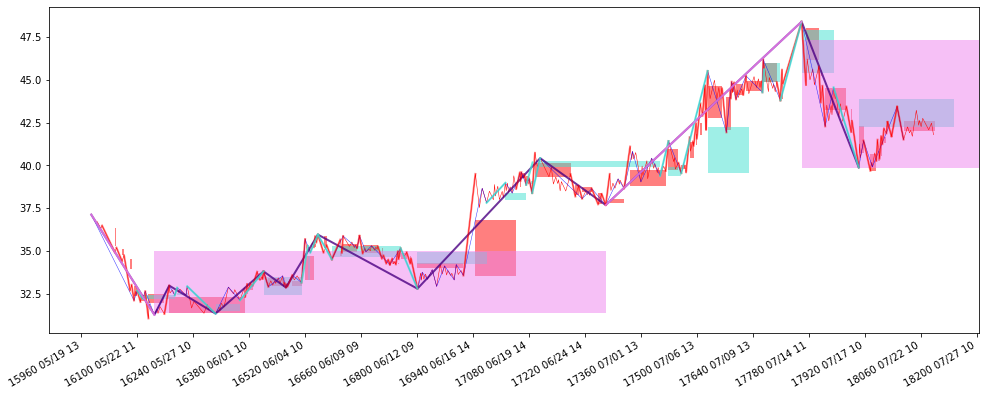

In [111]:
s_idx, e_idx =16000,18100
# 绘制全景图
# Input: dt_df, 
#        [s_idx: e_idx], 
#       对象列表？？ 

## 拼接 x_label
dt_df['label2'] = dt_df.index
dt_df['label'] = dt_df['label2'].apply(lambda x: x.strftime("%m/%d %H"))
dt_df['label'] = dt_df['TmIdx'].astype('str').str.cat(dt_df['label'], sep=' ')
dt_df.drop(['label2'],axis=1, inplace=True)
## x_label 转换函数
x_fmt = dt_df['label'].values.tolist()
def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

## 底图数据 by [s_idx: e_idx]
x = [s_idx, e_idx]
y = [dt_df.iloc[s_idx:e_idx].high.max(), dt_df.iloc[s_idx:e_idx].low.min()]
print(x,y)

## draw
fig, ax = plt.subplots(figsize=(1200/72,480/72))

#=== 底图设置
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int(len(ydata)/10)))
ax.plot(x, y, alpha=0)

#=== 
Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b',alpha = 0.8)
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2, alpha = 0.8)

pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list1 = [pp for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list1, facecolor='turquoise', alpha=0.8)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=False, alpha=0.8)

fig.autofmt_xdate()
plt.savefig('全景{0}_{1}.png'.format(str(int(s_idx)), str(int(e_idx))))

In [95]:
"img"+str(s_idx)+"_"+str(e_idx)+".png"

'img4820_6221.png'

s:4820,e:6221,len:1402


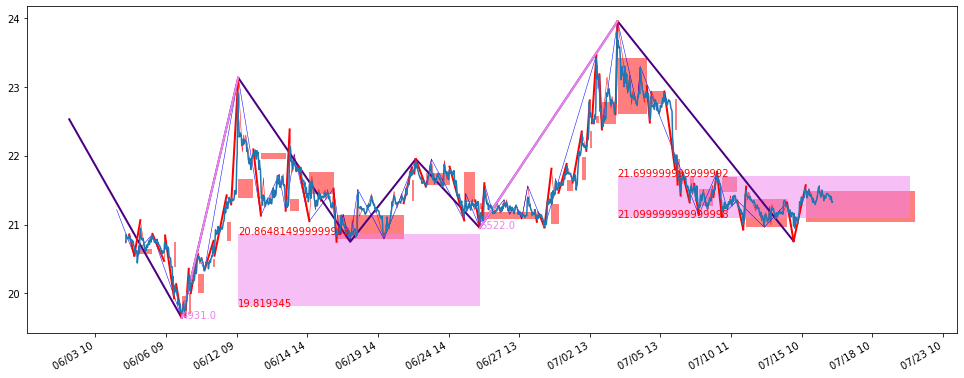

In [72]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

ydata = dt_df.loc[s_stp:e_stp,'close'].values
xdata = dt_df.loc[s_stp:e_stp,'TmIdx'].values
print("s:{0},e:{1},len:{2}".format(s_idx,e_idx,len(ydata)))

# format the ticks
tmLabel = dt_df.loc[s_stp:e_stp,'close'].index
x_fmt = [x.strftime("%m/%d %H") for x in dt_df.index]

def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int(len(ydata)/10)))

Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b')
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2)

pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=True)
#ax.text(11442,33.93,'33.93')
ax.plot(xdata,ydata)
fig.autofmt_xdate()
plt.savefig("image01.png")
plt.show()

In [ ]:
[st for st in m.Lv3_L if s_idx<st.peak.TmIdx<=13000]

In [ ]:
[[pp.TmS, pp.drt, pp.ccHL[3],pp.ccHL[2]] for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<11500]

In [ ]:
m.Lv0_L[0].start

In [ ]:
pp = m.PLv0_L[4]

In [ ]:
[( (pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]), 
  pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx,
  pp.ccHL[3] - pp.ccHL[2]) 
 for pp in m.PLv0_L[1:5]]

In [ ]:
dt_df.iloc[168].name

In [ ]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

# get xy data
x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.savefig("image01.png")
#plt.show()

In [ ]:
def candel_plotter(ax, data_df, i, w):
    data = data_df[i-w:i+w]
    data_up = data.query('open <= close')
    data_down = data.query('open > close')
    
    x = data_up.TmIdx.values
    ax.vlines(x, data_up.open.values, data_up.close.values, color='r', lw=5)
    ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
    x = data_down.TmIdx.values
    ax.vlines(x, data_down.close.values, data_down.open.values, color='g', lw=5)
    ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)
    
    #out = ax.plot(data1, data2, **param_dict)
    return None

In [ ]:
i, w = 10000,50
fig, ax = plt.subplots(1, 1,figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].index
x_idx = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x)
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


candel_plotter(ax, dt_df, i, w)
fig.autofmt_xdate()
plt.show()

In [ ]:
x_fmt[18]

In [ ]:
dt_df[500:501].index

In [ ]:
dt_df.loc['2019-11-8 13':'2019-11-11']

In [ ]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [ ]:
pd.core.index

In [ ]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [ ]:
def verity_valley_after_peak(lv_L):
    return True

In [ ]:
verify_end_to_end(m.Lv1_L)

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [ ]:
tmIdx = 15929


In [ ]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [ ]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

In [ ]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [ ]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [ ]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [ ]:
draw_k(15027,500)

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [ ]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

### draw Pair

In [ ]:
p = find_pair(tmIdx,0)[1]
p.__dict__

In [ ]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [ ]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

In [ ]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

In [ ]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

In [ ]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

In [ ]:
df_p

In [ ]:
df_draw.fillna('', inplace=True)
df_draw

In [ ]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [ ]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [ ]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [ ]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)